In [135]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch
from PPO import PPOAGENT
from SAC import SACAgent
from TD3 import TD3Agent

In [105]:
def plot_mean_std_curves(all_rewards_dict, title='Learning Curve', xlabel='Episode', ylabel='Reward'):
    plt.figure(figsize=(10, 6))
    for label, rewards in all_rewards_dict.items():
        mean_rewards = rewards.mean(axis=0)
        std_rewards = rewards.std(axis=0)
        episodes = np.arange(len(mean_rewards))
        plt.plot(episodes, mean_rewards, label=label)
        plt.fill_between(episodes, mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.2)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Continuous Action Space

### Experiment 1: Pendulum-v1

In [106]:
env = gym.make("Pendulum-v1")
num_episodes = 200
training_time = 480  # 480 seconds = 8 minutes

In [107]:
def run(make_agent_fn, env, num_episodes=200, seeds=[42, 7, 99], training_time=480, training_mode = "episode"):
    all_rewards = []

    for seed in seeds:
        env.reset(seed=seed)
        np.random.seed(seed)
        torch.manual_seed(seed)

        agent = make_agent_fn()

        if training_mode == "episode":
            rewards = agent.learn(num_episodes=num_episodes)
        else:
            rewards = agent.learn(max_training_time=training_time)
        all_rewards.append(rewards)

    return np.array(all_rewards)  # Shape: (seeds, episodes)

In [108]:
def make_td3():
    return TD3Agent(env=env, lr=1e-3)

def make_td3_init_random():
    return TD3Agent(env=env, start_steps=1000, lr=1e-3)

def make_td3_more_expl_noise():
    return TD3Agent(env=env, expl_noise=0.5, lr=1e-3)

def make_td3_more_policy_noise():
    return TD3Agent(env=env, policy_noise=0.5, noise_clip=0.7, lr=1e-3)

In [109]:
td3_rewards = run(make_td3, env, num_episodes=num_episodes)
td3_initial_random_rewards = run(make_td3_init_random, env, num_episodes=num_episodes)
td3_more_random_rewards = run(make_td3_more_expl_noise, env, num_episodes=num_episodes)
td3_more_policy_noise_rewards = run(make_td3_more_policy_noise, env, num_episodes=num_episodes)

100%|██████████| 200/200 [01:15<00:00,  2.65it/s]


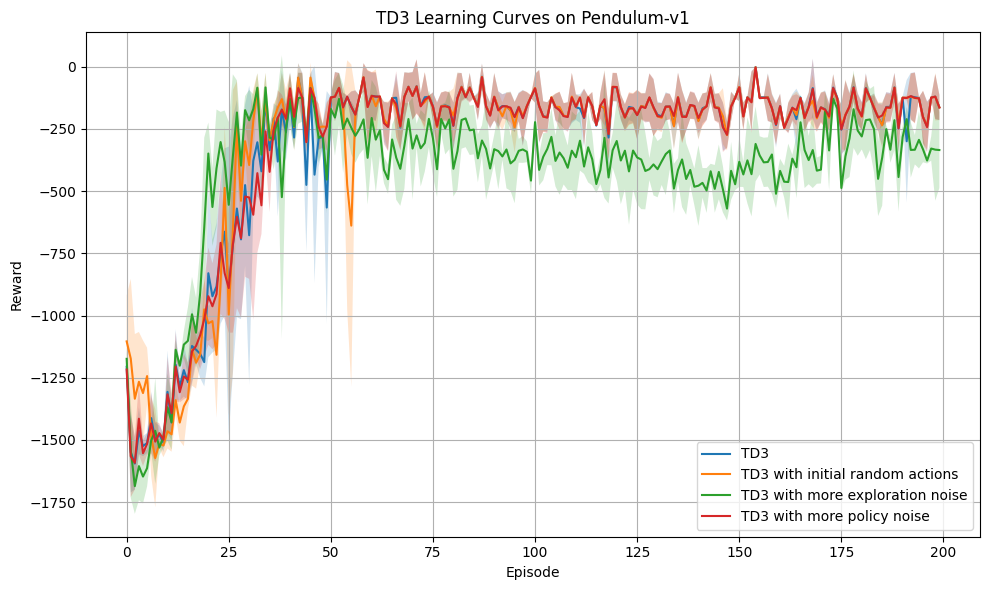

In [146]:
plot_mean_std_curves({
    "TD3": td3_rewards,
    "TD3 with initial random actions": td3_initial_random_rewards,
    "TD3 with more exploration noise": td3_more_random_rewards
    ,"TD3 with more policy noise": td3_more_policy_noise_rewards
}, title="TD3 Learning Curves on Pendulum-v1",
    xlabel='Episode',
    ylabel='Reward')

In [114]:
def make_sac():
    return SACAgent(env=env)

def make_sac_init_random():
    return SACAgent(env=env, start_steps=1000)

def make_sac_more_alpha():
    return SACAgent(env=env, alpha=0.5)

In [115]:
sac_rewards = run(make_sac, env, num_episodes=num_episodes)
sac_initial_random_rewards = run(make_sac_init_random, env, num_episodes=num_episodes)
sac_more_alpha_rewards = run(make_sac_more_alpha, env, num_episodes=num_episodes)

100%|██████████| 200/200 [02:03<00:00,  1.62it/s]


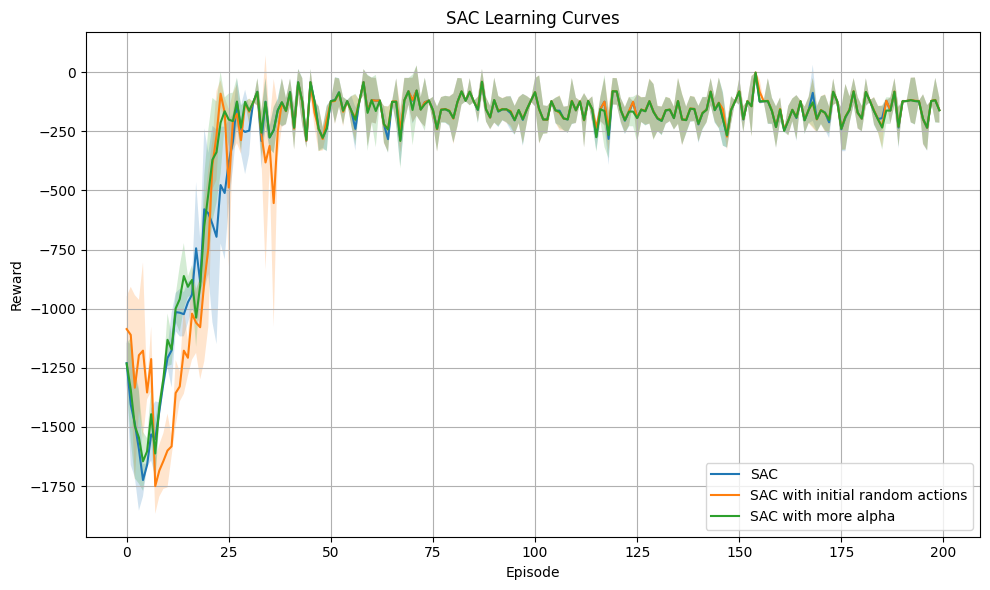

In [116]:
plot_mean_std_curves({"SAC": sac_rewards,
                      "SAC with initial random actions": sac_initial_random_rewards,
                      "SAC with more alpha": sac_more_alpha_rewards},
                     title='SAC Learning Curves',
                     xlabel='Episode',
                     ylabel='Reward')

In [140]:
def make_ppo():
    return PPOAGENT(env=env)

In [141]:
ppo_rewards = run(make_ppo, env, num_episodes=200)

100%|██████████| 200/200 [00:25<00:00,  7.82it/s]


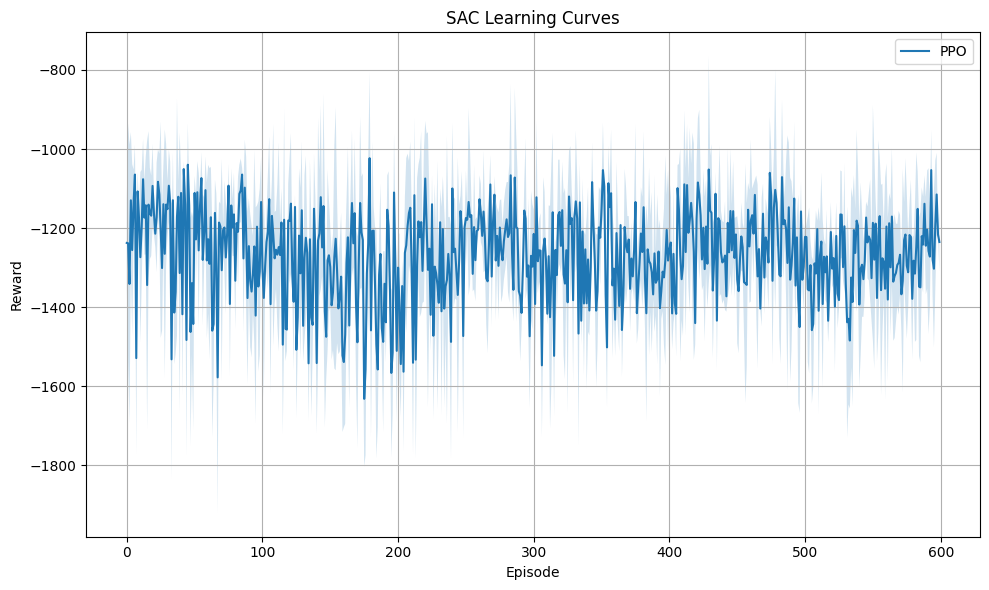

In [142]:
plot_mean_std_curves({"PPO": ppo_rewards,},
                     title='SAC Learning Curves',
                     xlabel='Episode',
                     ylabel='Reward')

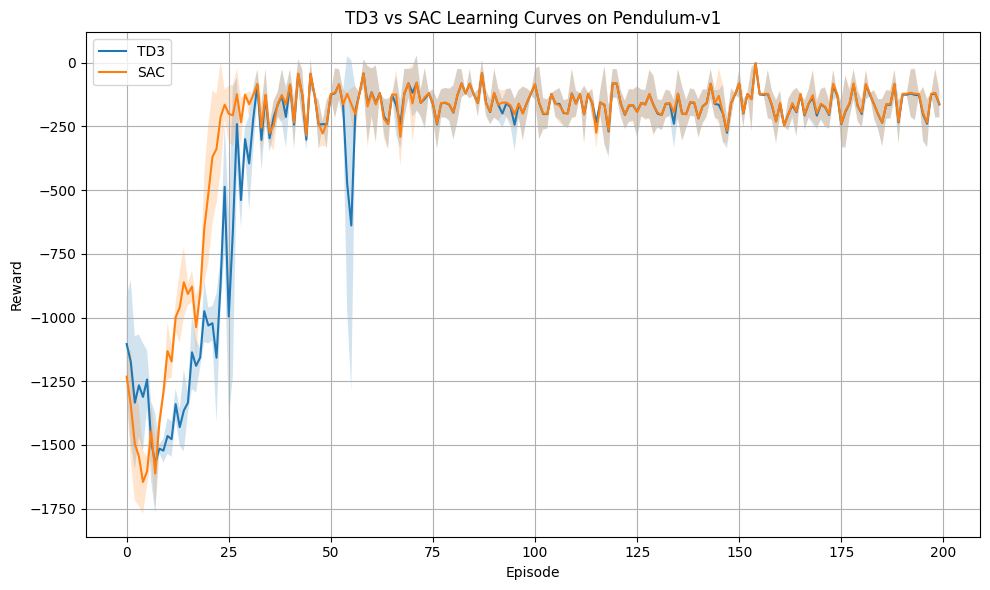

In [147]:
plot_mean_std_curves({"TD3": td3_initial_random_rewards,
                      "SAC": sac_more_alpha_rewards},
                     title='TD3 vs SAC Learning Curves on Pendulum-v1',
                     xlabel='Episode',
                     ylabel='Reward')